In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Importing data
def data_load(file='Downloads\Lecture9-master (1)\Lecture9-master\Assignment\VSL_Data1.csv'):
    data = pd.read_csv('Downloads\Lecture9-master (1)\Lecture9-master\Assignment\VSL_Data1.csv')
    return data

df = data_load()

data = pd.read_csv('Downloads\Lecture9-master (1)\Lecture9-master\Assignment\VSL_Data1.csv')

In [3]:
#naming fields
time = np.int32(data['Time'])
hours = time/3600
speed = np.float32(data['Speed'])    
occup = np.float32(data['Occu'])
label = np.str(data['Label'])
lab = np.float32(df.Label.apply(lambda x: x[:2])) 

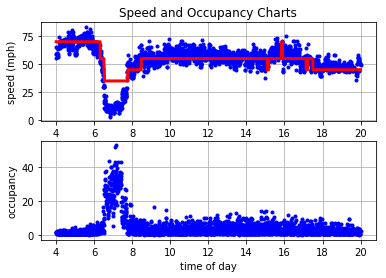

In [4]:
#plotting raw data
plt.subplot(211)
plt.plot(hours,speed,'b.')
plt.plot(hours,lab,'r',linewidth=3)
plt.title('Speed and Occupancy Charts')
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.grid(True)
plt.subplot(212)
plt.plot(hours,occup,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [5]:
#import fft
from numpy import fft

C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


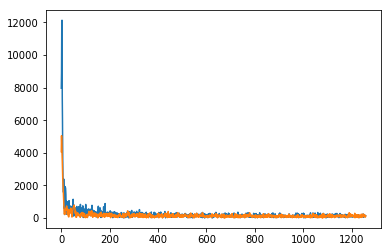

In [6]:
#apply fft and plot
speedFFT= np.fft.fft(speed)
plt.plot(abs(speedFFT[1:len(speedFFT)/2]))
plt.grid()
occupFFT= np.fft.fft(occup)
plt.plot(abs(occupFFT[1:len(occupFFT)/2]))
plt.grid()

In [7]:
#Denoising data
threshold = 2000
mask = abs(speedFFT) > threshold
speed_DEnoise_FFT = speedFFT * mask
speed_DEnoise_iFFT = np.fft.ifft(speed_DEnoise_FFT)
mask = abs(occupFFT) > threshold
occup_DEnoise_FFT = occupFFT * mask
occup_DEnoise_iFFT = np.fft.ifft(occup_DEnoise_FFT)

C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


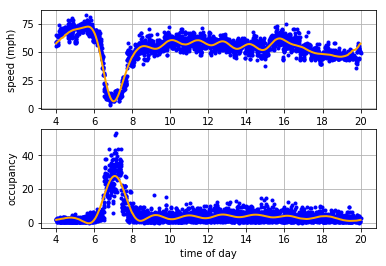

In [8]:
#plotting raw and FFT smooth data
plt.subplot(211)
plt.plot(hours,speed,'b.')
plt.plot(hours, speed_DEnoise_iFFT,'orange',linewidth=2.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.grid(True)
plt.subplot(212)
plt.plot(hours,occup,'b.')
plt.plot(hours, occup_DEnoise_iFFT,'orange', linewidth=2.0)
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [9]:
#import convolve
from numpy import convolve

In [10]:
#define moving average and calculating
def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma

speedMA = movingaverage(speed,6)
occupMA = movingaverage(occup,6)

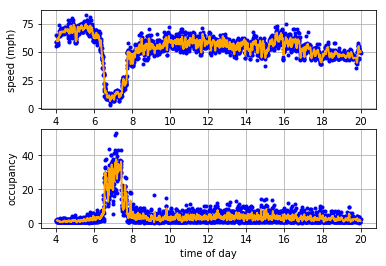

In [11]:
#plot raw and MA smooth data
plt.subplot(211)
plt.plot(hours,speed,'b.')
plt.plot(hours[len(hours)-len(speedMA):], speedMA,'orange',linewidth=2.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.grid(True)
plt.subplot(212)
plt.plot(hours,occup,'b.')
plt.plot(hours[len(hours)-len(occupMA):], occupMA,'orange', linewidth=2.0)
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

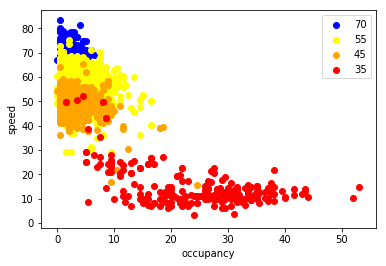

In [12]:
#plot classified data
import pylab as pl
import numpy as np
from ipywidgets import interact, interactive, fixed

plt.scatter(occup[lab==70],speed[lab==70],color='b',label=70)
plt.scatter(occup[lab==55],speed[lab==55],color='yellow',label=55)
plt.scatter(occup[lab==45],speed[lab==45],color='orange',label=45)
plt.scatter(occup[lab==35],speed[lab==35],color='r',label=35)
plt.legend()
plt.xlabel("occupancy")
plt.ylabel("speed")

In [13]:
#attempt at using Shuo plot, didn't figure it out
def prettyPicture(clf, X_test, y_test):
    x_min = 0.0; x_max = 60.0
    y_min = 0.0; y_max = 90.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    plt.scatter(occup[lab==70],speed[lab==70],color='b',label=70)
    plt.scatter(occup[lab==55],speed[lab==55],color='yellow',label=55)
    plt.scatter(occup[lab==45],speed[lab==45],color='orange',label=45)
    plt.scatter(occup[lab==35],speed[lab==35],color='r',label=35)
    plt.legend()
    plt.xlabel("occupancy")
    plt.ylabel("speed")

In [14]:
#create array of speed and occup
rawtrain = np.column_stack((speed,occup))

In [15]:
# SVM raw training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf=SVC()
clf.fit(rawtrain, lab)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
pred = clf.predict(rawtrain)
acc = accuracy_score(pred, lab)
print("train accuracy = ",acc)

train accuracy =  0.825466084887


In [16]:
#importing VSL2 data
data2 = pd.read_csv('Downloads\Lecture9-master (1)\Lecture9-master\Assignment\VSL_Data2.csv')

In [17]:
#creating fields for VSL2 data
time2 = np.int32(data2['Time'])
hours2 = time2/3600
speed2 = np.float32(data2['Speed'])    
occup2 = np.float32(data2['Occu'])
label2 = np.str(data2['Label'])

In [18]:
#create array of raw VSL2 data
rawtest = np.column_stack((speed2,occup2))

In [19]:
#prediction using SVM raw classifier
predtest = clf.predict(rawtest)

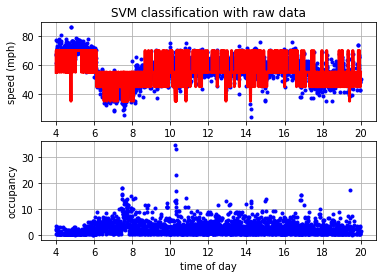

In [20]:
#plot raw and prediction with SVM raw classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2,predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('SVM classification with raw data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [21]:
# Decision Tree raw training

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(rawtrain, lab)

pred = clf.predict(rawtrain)
acc = accuracy_score(pred, lab)
print("train accuracy = ",acc)

train accuracy =  0.900039666799


In [22]:
#prediction using Decision Tree raw classifier
predtest = clf.predict(rawtest)

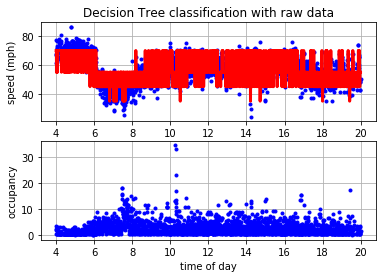

In [23]:
#plot raw and prediction with Decision Tree raw classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2,predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('Decision Tree classification with raw data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [24]:
#create array of FFT speed and occup
FFTTrain = np.column_stack((speed_DEnoise_iFFT,occup_DEnoise_iFFT))

In [25]:
# SVM FFT training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf=SVC()
clf.fit(FFTTrain, lab)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
pred = clf.predict(FFTTrain)
acc = accuracy_score(pred, lab)
print("train accuracy = ",acc)

C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


train accuracy =  0.966283220944


C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


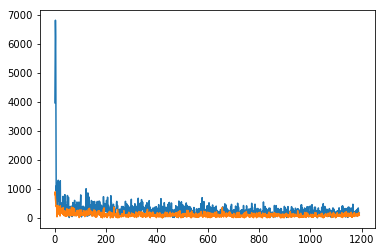

In [26]:
#applying FFT to VSL2 and plotting
speedFFT2= np.fft.fft(speed2)
plt.plot(abs(speedFFT2[1:len(speedFFT2)/2]))
plt.grid()
occupFFT2= np.fft.fft(occup2)
plt.plot(abs(occupFFT2[1:len(occupFFT2)/2]))
plt.grid()

In [27]:
#denoise FFT VSL2
threshold = 2000
mask = abs(speedFFT2) > threshold
speed_DEnoise_FFT2 = speedFFT2 * mask
speed_DEnoise_iFFT2 = np.fft.ifft(speed_DEnoise_FFT2)
mask = abs(occupFFT2) > threshold
occup_DEnoise_FFT2 = occupFFT2 * mask
occup_DEnoise_iFFT2 = np.fft.ifft(occup_DEnoise_FFT2)

In [28]:
#create array of FFT VSL2 speed and occupancy
FFTTest = np.column_stack((speed_DEnoise_iFFT2,occup_DEnoise_iFFT2))

In [29]:
#prediction using SVM FFT classifier
predtest = clf.predict(FFTTest)

C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


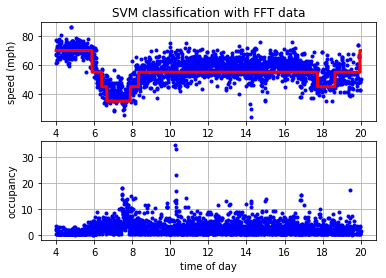

In [30]:
#plot raw and prediction with SVM FFT classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2,predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('SVM classification with FFT data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [31]:
# Decision Tree FFT training

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(FFTTrain, lab)

pred = clf.predict(FFTTrain)
acc = accuracy_score(pred, lab)
print("train accuracy = ",acc)

train accuracy =  1.0


C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [32]:
#prediction using Decision Tree FFT classifier
predtest = clf.predict(FFTTest)

C:\Users\sknick\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:382: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


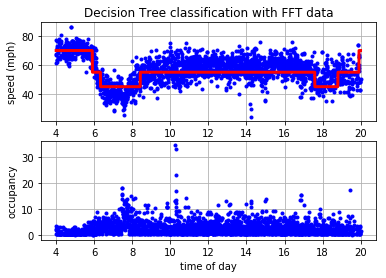

In [33]:
#plot raw and prediction with Decision Tree FFT classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2,predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('Decision Tree classification with FFT data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [34]:
#create array of MA speed and occupancy
MATrain = np.column_stack((speedMA,occupMA))

In [35]:
# SVM MA training
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf=SVC()
clf.fit(MATrain, lab[len(hours)-len(speedMA):])
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
    
pred = clf.predict(MATrain)
acc = accuracy_score(pred, lab[len(hours)-len(speedMA):])
print("train accuracy = ",acc)

train accuracy =  0.880365659777


In [36]:
#create MA fields for VSL2
speedMA2 = movingaverage(speed2,6)
occupMA2 = movingaverage(occup2,6)

In [37]:
#array for MA VSL2
MATest = np.column_stack((speedMA2,occupMA2))

In [38]:
#prediction using SVM MA classifier
predtest = clf.predict(MATest)

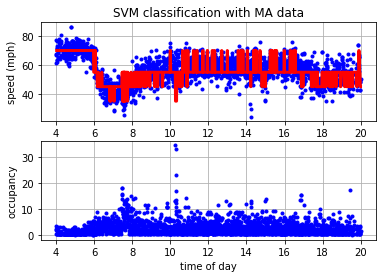

In [39]:
#plot raw and prediction with SVM MA classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2[len(hours)-len(speedMA):],predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('SVM classification with MA data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)

In [40]:
# Decision Tree MA training

from sklearn import tree
from sklearn.metrics import accuracy_score

clf = tree.DecisionTreeClassifier()
clf = clf.fit(MATrain, lab[len(hours)-len(speedMA):])

pred = clf.predict(MATrain)
acc = accuracy_score(pred, lab[len(hours)-len(speedMA):])
print("train accuracy = ",acc)

train accuracy =  0.99960254372


In [41]:
#prediction using Decision Tree MA classifier
predtest = clf.predict(MATest)

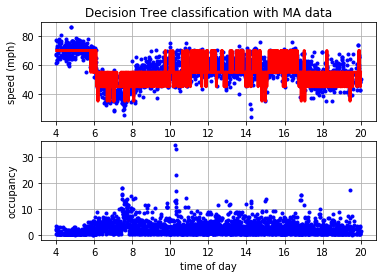

In [42]:
#plot raw and prediction with Decision Tree MA classifier
plt.subplot(211)
plt.plot(hours2,speed2,'b.')
plt.plot(hours2[len(hours)-len(speedMA):],predtest,'r',linewidth=3.0)
plt.xlabel('time of day')
plt.ylabel('speed (mph)')
plt.title('Decision Tree classification with MA data')
plt.grid(True)
plt.subplot(212)
plt.plot(hours2,occup2,'b.')
plt.xlabel('time of day')
plt.ylabel('occupancy')
plt.grid(True)